c:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


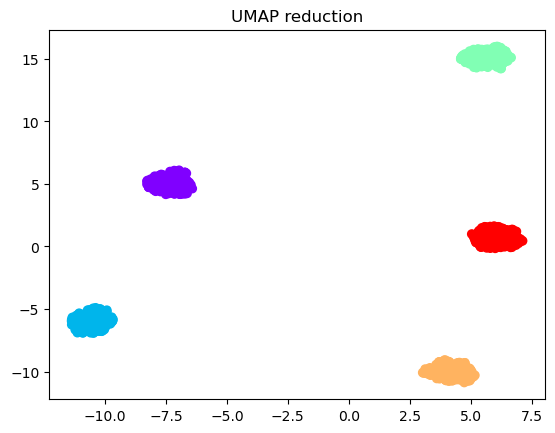

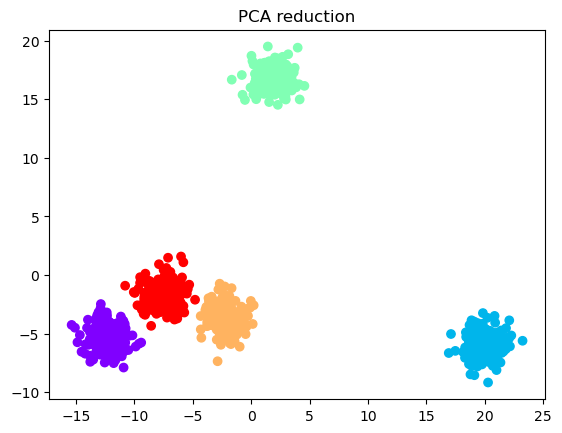

In [29]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt

# generate some sample data
data, labels = make_blobs(n_samples=1000, n_features=10, centers=5)

# reduce the dimensionality of the data using UMAP
reducer = umap.UMAP()
reduced_data = reducer.fit_transform(data)

# reduce the dimensionality of the data using PCA for comparison
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# plot the data points in 2D
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='rainbow')
plt.title("UMAP reduction")
plt.show()

# plot the data points in 2D
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')
plt.title("PCA reduction")
plt.show()

In [34]:
import pickle
import pandas as pd
with open('model/lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

for each_doc in question_lda:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1
list_topic = []
for each_doc in question_lda:
    list_topic_each_doc = []
    for each_topic in each_doc:
        list_topic_each_doc.append(each_topic[1])
    list_topic.append(list_topic_each_doc)
df = pd.DataFrame(list_topic)
print(df.info()) 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6531 non-null   float64
 1   1       6531 non-null   float64
 2   2       6531 non-null   float64
 3   3       6531 non-null   float64
 4   4       6531 non-null   float64
 5   5       6531 non-null   float64
dtypes: float64(6)
memory usage: 306.3 KB
None


,0,1,2,3,4,5
0,0.035494,0.026652,0.602592,0.059402,0.216486,0.059373
1,0.278622,0.067144,0.540052,0.017607,0.072253,0.024322
2,0.111220,0.010002,0.023806,0.203242,0.640339,0.011392
3,0.800639,0.029094,0.077192,0.039709,0.026180,0.027186
4,0.033127,0.236562,0.019031,0.061575,0.560622,0.089084
...,...,...,...,...,...,...
6526,0.051822,0.050537,0.048493,0.178873,0.624873,0.045403
6527,0.060200,0.107875,0.053167,0.312189,0.411099,0.055471
6528,0.035010,0.042009,0.030580,0.432117,0.421827,0.038457
6529,0.096552,0.095839,0.095855,0.505646,0.109766,0.096342


In [35]:
reducer = umap.UMAP()
reduced_data = reducer.fit_transform(df)

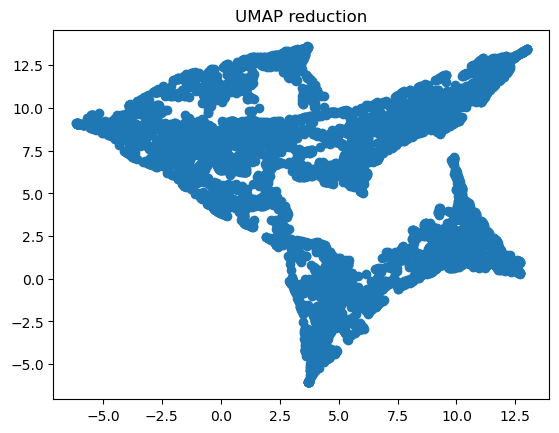

In [37]:
# plot the data points in 2D
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='rainbow')
plt.title("UMAP reduction")
plt.show()

In [30]:
data

array([[ -1.4320948 ,   4.38541665,   5.56148868, ...,  -5.26702517,
          5.52913994,   2.45123318],
       [ -1.84906849,   4.82093918,   3.41239354, ...,  -6.4606854 ,
          4.08630427,   1.4355902 ],
       [ -0.91905567,  -3.08195913,  -7.97312654, ...,  -5.36270195,
        -10.11434299,   3.19119598],
       ...,
       [  8.39267787,  -7.5817036 ,  -3.10318868, ...,  -6.35922965,
         -3.89774697,  -5.60081005],
       [ -0.61930658,   6.34166934,   5.45942834, ...,  -6.43016026,
          4.4083459 ,   1.400257  ],
       [  8.90657076,  -6.56184966,  -2.06454385, ...,  -6.54402202,
         -3.70159224,  -6.29388962]])

In [31]:
labels

array([3, 3, 4, 0, 4, 0, 3, 0, 3, 1, 0, 2, 1, 0, 2, 3, 2, 4, 4, 1, 3, 3,
       4, 4, 0, 1, 3, 1, 2, 3, 2, 1, 1, 2, 2, 0, 3, 4, 0, 1, 0, 3, 2, 0,
       2, 0, 3, 3, 4, 0, 2, 0, 4, 4, 4, 3, 4, 0, 1, 3, 2, 1, 0, 2, 0, 3,
       0, 0, 1, 0, 1, 4, 2, 1, 1, 0, 4, 2, 4, 4, 4, 3, 3, 1, 4, 3, 2, 3,
       2, 1, 4, 0, 3, 0, 2, 0, 4, 3, 1, 1, 0, 0, 3, 4, 2, 3, 1, 2, 2, 1,
       0, 4, 2, 3, 3, 2, 1, 4, 0, 4, 0, 2, 3, 2, 2, 2, 4, 1, 4, 3, 2, 1,
       0, 3, 4, 3, 1, 1, 1, 1, 1, 2, 0, 1, 1, 3, 3, 4, 0, 0, 0, 0, 1, 1,
       1, 4, 3, 2, 2, 3, 4, 4, 1, 2, 1, 2, 2, 4, 1, 1, 3, 4, 0, 0, 2, 0,
       4, 1, 4, 3, 4, 1, 2, 2, 3, 0, 2, 2, 0, 4, 1, 0, 1, 2, 2, 0, 0, 1,
       3, 2, 0, 0, 3, 2, 3, 0, 3, 4, 4, 1, 2, 4, 4, 0, 1, 1, 4, 3, 0, 4,
       0, 0, 2, 2, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0, 4, 2, 2, 3, 1, 2, 0, 2,
       1, 3, 2, 3, 4, 1, 0, 3, 2, 1, 1, 3, 3, 0, 1, 0, 0, 3, 3, 0, 4, 3,
       3, 2, 1, 4, 1, 4, 4, 1, 0, 0, 3, 2, 1, 1, 2, 3, 1, 0, 0, 3, 2, 0,
       4, 2, 4, 4, 1, 1, 2, 3, 3, 4, 3, 3, 2, 2, 0,